# 1 - Importation de la data

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

data = read_csv('Data_Arbre.csv')
data.head()

,longitude,latitude,clc_quartier,clc_secteur,haut_tot,haut_tronc,tronc_diam,fk_arb_etat,fk_stadedev,fk_port,fk_pied,fk_situation,fk_revetement,age_estim,fk_prec_estim,clc_nbr_diag,fk_nomtech,villeca,feuillage,remarquable
0,3.293264,49.840500,Quartier du Centre-Ville,Quai Gayant,6.0,2.0,37.0,EN PLACE,Jeune,semi libre,gazon,Alignement,Non,15.0,5.0,0.0,QUERUB,VILLE,Feuillu,Non
1,3.273380,49.861409,Quartier du Vermandois,Stade Cepy,13.0,1.0,160.0,EN PLACE,Adulte,semi libre,gazon,Groupe,Non,50.0,10.0,0.0,PINNIGnig,VILLE,Conifère,Non
2,3.289068,49.844513,Quartier du Centre-Ville,Rue Villebois Mareuil,12.0,3.0,116.0,REMPLACÉ,Adulte,semi libre,gazon,Alignement,Non,30.0,10.0,0.0,ACEPSE,VILLE,Feuillu,Non
3,3.302387,49.861778,Quartier de l'Europe,Square des Marronniers,16.0,3.0,150.0,EN PLACE,Adulte,semi libre,gazon,Groupe,Non,50.0,2.0,0.0,ACEPLA,VILLE,Feuillu,Non
4,3.304047,49.858446,Quartier de l'Europe,Avenue Buffon,5.0,2.0,170.0,Essouché,Adulte,réduit,gazon,Isolé,Non,40.0,2.0,0.0,SALBAB,VILLE,Feuillu,Non


# 2 - Préparation des données

- Extraction des données d’intérêt : Sélectionner les colonnes pertinentes de la base de données selon ce besoin. 
- Encodage des données catégorielles. 
- Normalisation des données ou pas. -
 Cible : (‘age_estim’)
Utiliser des techniques de prétraitement de données pour préparer les données d’apprentissage. Référez-vous à https://scikitlearn.org/stable/modules/preprocessing.html

### 2 - 1. Corrélation variable qualitative

C:\Users\Admin\AppData\Local\Temp\ipykernel_29780\768175331.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='age_estim', hue=column, ax= ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29780\768175331.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='age_estim', hue=column, ax= ax)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29780\768175331.py:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='age_estim', hue=column, ax= ax)


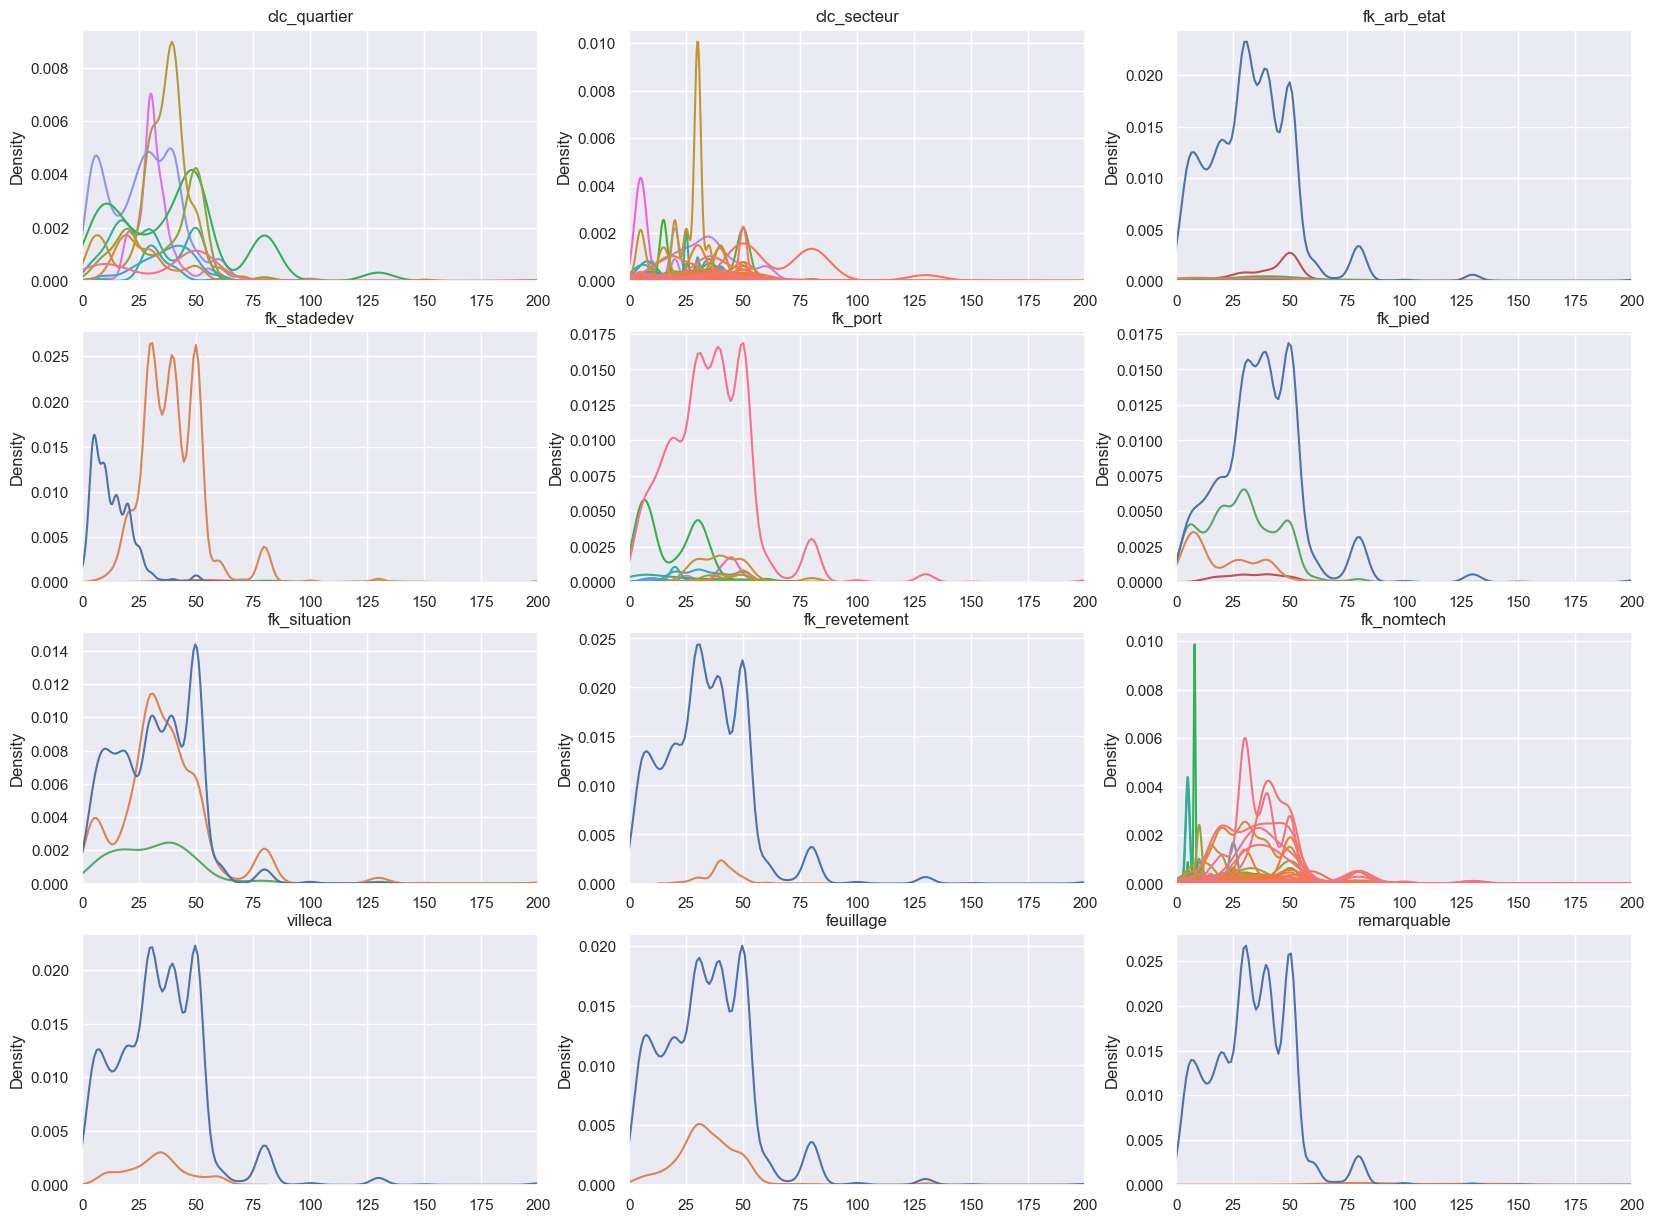

In [43]:
# fait un kde plot entre k'âge et tout les autre data
import seaborn as sns
import math

columns = ['clc_quartier', 'clc_secteur', 'fk_arb_etat', 'fk_stadedev', 'fk_port', 'fk_pied', 'fk_situation', 'fk_revetement', 'fk_nomtech', 'villeca', 'feuillage', 'remarquable']
rows = math.ceil(math.sqrt(len(columns)))
cols = math.ceil(len(columns) / rows)
    
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]
    
for i, (column, ax) in enumerate(zip(columns, axes.flatten())):
    sns.kdeplot(data=data, x='age_estim', hue=column, ax= ax)
    ax.set_xlim(0, 200)
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_title(column)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
sns.set_theme()
plt.show()  


Le kde affiche la densité de la fonctionnalité pour chaque valeur de l'âge'. Il y a généralement 2 ou plusieurs pics colorées représentant les 2 ou plusieurs valeurs de la feature. Si les pics sont bien séparées (ex: fk_stadedev ) et ne se chevauchent pas, il existe alors une corrélation avec l'âge. Si les pics se chevauchent beaucoup, cela signifie que la caractéristique n'est pas bien corrélée avec l'âge.

Ici on remarque que seul fk_stadedev et fk_nomtech sont corréler avec l'âge_estim

### 2 - 2.Corrélation variable quantitative

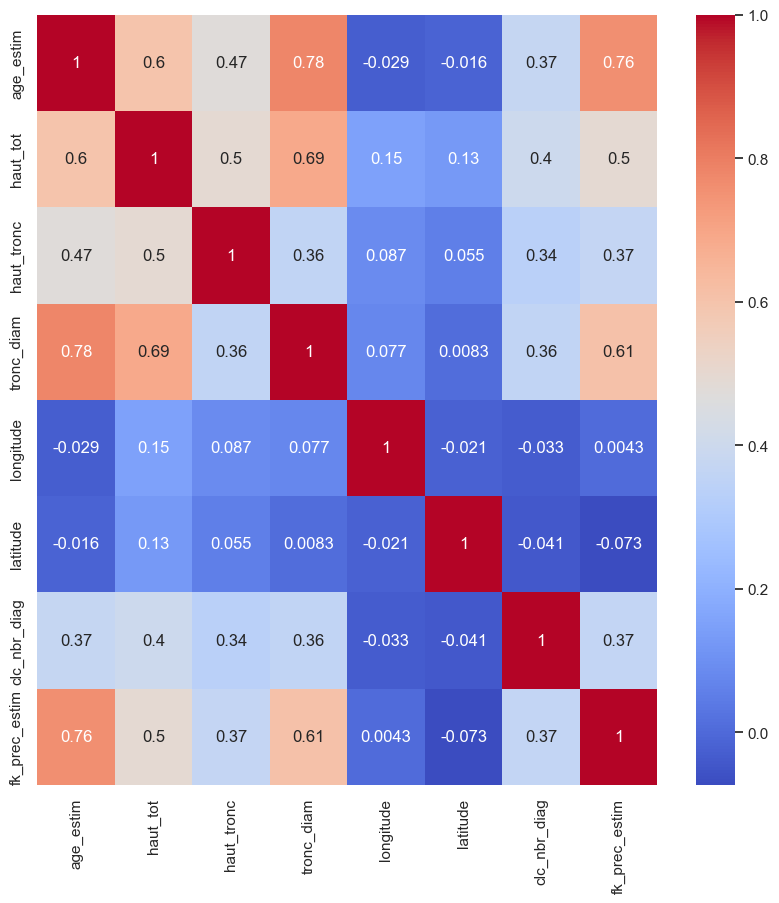

In [44]:
#Corrélation variable quantitative
numeric_columns = ['age_estim', 'haut_tot', 'haut_tronc', 'tronc_diam', 'longitude', 'latitude','clc_nbr_diag','fk_prec_estim']
correlation = data[numeric_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Ici on remarque que les variables haut_tot, haut_tronc, tronc_diam et clc_nbr_dialog ont un bon coefficient de corrélation avec âge_estim

Ps : on ne prend pas Remarquable et fk_prec_estim même si ces variables ont des bonnes corrélation car elle même sont determinées grâce à l'âge_estim

Variable à prendre pour prédire l'âge :

- haut_tronc
- haut_tot
- tronc_diam
- fk_stadedev
- clc_nbr_diag
- fk_nomtech

### 2 - 3. Normalisation et encodage des données

Selection des features

In [45]:
y = data[['age_estim']]
X = data[['haut_tronc','tronc_diam','fk_stadedev','clc_nbr_diag','fk_nomtech','haut_tot']]

print(X.head())
print(y.head())


   haut_tronc  tronc_diam fk_stadedev  clc_nbr_diag fk_nomtech  haut_tot
0         2.0        37.0       Jeune           0.0     QUERUB       6.0
1         1.0       160.0      Adulte           0.0  PINNIGnig      13.0
2         3.0       116.0      Adulte           0.0     ACEPSE      12.0
3         3.0       150.0      Adulte           0.0     ACEPLA      16.0
4         2.0       170.0      Adulte           0.0     SALBAB       5.0
   age_estim
0       15.0
1       50.0
2       30.0
3       50.0
4       40.0


Encodage Ordinal et des labels

In [46]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

encoder = OrdinalEncoder()
encoded_fk_stadedev = encoder.fit_transform(X[['fk_stadedev']])
X['fk_stadedev'] = encoded_fk_stadedev

encoderlabel = LabelEncoder()
encoded_fk_nomtech = encoderlabel.fit_transform(X[['fk_nomtech']])
X['fk_nomtech'] = encoded_fk_nomtech

C:\Users\Admin\AppData\Local\Temp\ipykernel_29780\2683875300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fk_stadedev'] = encoded_fk_stadedev
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_29780\2683875300.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Scale les features

In [47]:
from sklearn.preprocessing import StandardScaler

scaler_feature = StandardScaler()
scaler_age = StandardScaler()
X = scaler_feature.fit_transform(X)
y = scaler_age.fit_transform(y)



### 2 - 4. Base de test et train

In [48]:
from sklearn.model_selection import train_test_split
import pandas as pd

indices = np.arange(data.shape[0])
print(indices)
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(X,y,indices, test_size=0.2, random_state=42)


print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
print(indices_train,indices_test)



[   0    1    2 ... 7406 7407 7408]
(5927, 6) (1482, 6)
(5927, 1) (1482, 1)
[5628 5246 1049 ... 5390  860 7270] [7092 1544 2431 ... 4139 6203 4393]


### 2 - 4 Import JSON de la base de test

In [49]:
import json
data2 = read_csv('Data_Arbre.csv')
data_test = data2.iloc[indices_test]
data_test.to_json('data_test.json',orient='records')
print(data_test.head())

      longitude   latitude                     clc_quartier  \
7092   3.301635  49.865548                           OMISSY   
1544   3.272708  49.847591  Quartier Saint-Martin - Oëstres   
2431   3.309938  49.854962               Quartier Remicourt   
3866   3.290565  49.859053             Quartier de l'Europe   
2549   3.299023  49.834308      Quartier du faubourg d'Isle   

                              clc_secteur  haut_tot  haut_tronc  tronc_diam  \
7092              Terrain aventure Europe      18.0         5.0       112.0   
1544                  Rue Alexandre Dumas       8.0         2.0        85.0   
2431                  Auberge de jeunesse      15.0         1.0       160.0   
3866                Avenue Robert Schuman       9.0         2.0       145.0   
2549  Boulevard du Docteur Camille Guérin      15.0         3.0       115.0   

     fk_arb_etat fk_stadedev     fk_port fk_pied fk_situation fk_revetement  \
7092    EN PLACE      Adulte       Libre   Terre       Groupe      

- Choix de l'algorithme d’apprentissage : Sélectionner des/un algorithme(s) d’apprentissage pour prédire l’âge. 
- Référez-vous à https://scikitlearn.org/stable/supervised_learning.html#

# 3 - Test de différent modèle

## 3 - 1. Random Forest Regressor


### Code


Explication des hyperparamètres utiliser dans les différents grid search :

Max-depth : Profondeur maximal de l'arbre ici max-depth = 20

min_samples_leaf : Le nombre minimum d'échantillon requis pour être un noeud "feuille"

min_samples_split : Le nombre d'échantillon requis pour diviser un noeud interne.

n_estimators : le nombre d'arbre de la forêt. (avoir un grand nombre d'arbre est bien cela améliore la robustesse mais le coût computaionnel est lui aussi augmenté)

max_samples : fraction d'échantillons à tirer de l'ensemble de données total pour entraîner chaque arbre. Une valeur de 0.8 signifie que chaque arbre est entraîné sur 80% des données tirées au hasard. 

max_iter=1000 : Le nombre maximal d'itérations pour l'entraînement. Cela signifie que l'algorithme d'entraînement s'arrêtera après 1000 itérations au maximum, même si le modèle n'a pas encore convergé vers une solution.

hidden_layer_sizes=(100,100) : La taille des couches cachées du réseau. Ici, il y a deux couches cachées, chacune avec 100 neurones. Cela définit la capacité du modèle et sa capacité à capturer des relations complexes dans les données.

activation= "relu" : La fonction d'activation utilisée pour les neurones. ReLU (Rectified Linear Unit) est une fonction d'activation populaire qui introduit de la non-linéarité, permettant au modèle d'apprendre des relations complexes.

solver='adam' : L'algorithme d'optimisation utilisé pour l'entraînement du modèle. Adam est un optimiseur basé sur le calcul du gradient qui ajuste les taux d'apprentissage de chaque paramètre. Il est bien adapté pour les grands ensembles de données et les paramètres de haute dimension.

alpha=0.05 : Le terme de régularisation L2 (aussi appelé terme de pénalité). Il aide à prévenir le surajustement en ajoutant un coût proportionnel à la magnitude des poids du modèle. Une valeur plus élevée entraîne une régularisation plus forte.

learning_rate='constant' : Le taux d'apprentissage est maintenu constant tout au long de l'entraînement.


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Les hyperparamètres ont été trouver grâce à une GridSearchCV

rfr = RandomForestRegressor(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200,max_samples=0.8,max_features='log2', random_state=42)

rfr.fit(X_train,y_train.ravel())

y_predictions = rfr.predict(X_test)

mae = mean_absolute_error(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predictions)
cross_val = cross_val_score(rfr, X_test, y_test, cv=5).mean()



print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Cross Validation Score: {cross_val}")


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

Mean Absolute Error (MAE): 0.24500230701503742
Root Mean Squared Error (RMSE): 0.42593542645308874
R-squared (R²): 0.8182772441708803
Cross Validation Score: 0.7424395916910986


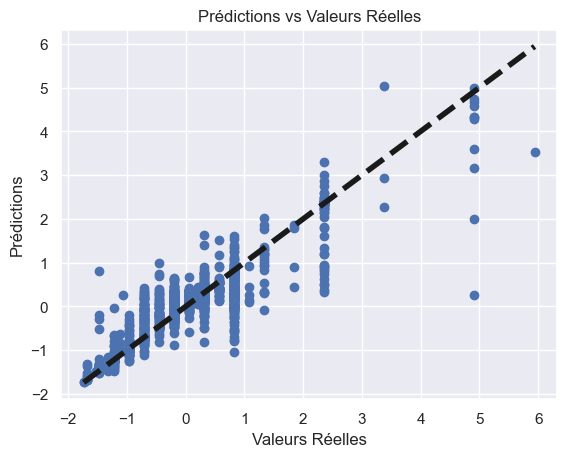

In [56]:
plt.scatter(y_test, y_predictions)
plt.title('Prédictions vs Valeurs Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()



### Interpretation

#### Fonctionnement Random Forest

- Combinaison de plusieurs arbres de décision :

Un ensemble de d'arbres de décision. Chaque arbre est construit à partir d'un échantillon aléatoire des données d'entrainement (bootstraping). Cela permet de réduire la variance sans augmenter le biais.

- Sélection aléatoire des caractéristiques :

 A chaque division (ou nœud), un sous-ensemble aléatoire des caractéristiques est choisi. Cela assure que les arbres sont diversifiés et réduit la corrélation entre eux.

 - Prédiction : 

 Pour faire une prédiction, Random Forest agrège les prédictions de tous les arbres. Pour la régression, la moyenne des prédictions des arbres est utilisée.

 - Importance des caractéristique : 

Evalue l'importance des différentes caractéristiques dans la prédiction. Cela se fait en observant combien la précision de la prédiction diminue lorsque les données pour une caractéristique sont aléatoirement mélangées. Plus la baisse est importante, plus la caractéristique est considérée comme importante.

Vidéo Youtube explicative :

https://www.youtube.com/watch?v=v6VJ2RO66Ag







#### Résultat

- Mean Absolute Error (MAE): 0.24500230701503742


MAE de 0.245 signifie que, en moyenne, les prédictions du modèle s'écartent de 0.245 unités de la valeur réelle.C'est relativement faible, cela indique que le modèle a une bonne précision.

- Root Mean Squared Error (RMSE): 0.42593542645308874

Comme pour le MAE, un RMSE plus faible indique une meilleure performance. Le RMSE étant supérieur au MAE, cela suggère la présence de quelques erreurs de prédiction relativement grandes.

- R-squared (R²): 0.8182772441708803


Un R² de 0.818 est généralement considéré comme indiquant une bonne adéquation du modèle aux données.

- Cross Validation Score: 0.7424395916910986

Un score de 0.742 suggère que le modèle est très généralisable, avec une performance plutôt constante à travers différents sous-ensembles des données. C'est un indicateur fort que le modèle devrait bien fonctionner sur des données non vues.

## 3 - 2. Classification And Regression Trees

### Code

In [38]:
from sklearn.tree import DecisionTreeRegressor

# param_grid = {
#     'max_depth': [None, 10,11,12,13,15,16, 20, 30, 40, 50],
#     'min_samples_split': [2, 5,6,7,8,9, 10],
#     'min_samples_leaf': [1, 2, 4,5,6,7,8,9,10],
# }
# Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 7}

dcr = DecisionTreeRegressor(
    max_depth=10, 
    min_samples_leaf=4, 
    min_samples_split=7, 
    random_state=42,
    criterion="squared_error",
    splitter="best",
    max_features=None,
    min_weight_fraction_leaf=0.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0
)

# grid_search = GridSearchCV(estimator=dcr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
dcr.fit(X_train, y_train)
# print("Meilleurs paramètres:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

y_pred = dcr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, y_pred)
cross_val = cross_val_score(dcr, X_test, y_test, cv=5).mean()

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {tree_rmse}")
print(f"R-squared (R²): {tree_r2}")
print(f"Cross Validation Score: {cross_val}")




Mean Absolute Error (MAE): 0.30149990787479575
Root Mean Squared Error (RMSE): 0.5084996857392401
R-squared (R²): 0.7409979715286941
Cross Validation Score: 0.6556251672631337


### Interprétation

#### Fonctionnement 

- Sélection de la caractérisques et du point de division:

L'algorithme commence avec l'ensemble de données entier et cherche la meilleure caractéristique et le meilleur point de division (seuil) pour diviser les données en sous-ensembles. Le "meilleur" est défini comme la division qui maximise la pureté des nœuds enfants ou minimise une fonction de coût (comme l'erreur quadratique moyenne pour la régression).

- Division récursive :

Cette étape est répétée de manière récursive pour chaque sous-ensemble résultant jusqu'à ce qu'un critère d'arrêt soit atteint. Les critères d'arrêt peuvent inclure un nombre minimum d'observations dans un nœud, une profondeur maximale de l'arbre.

- Création de feuilles: 

Une fois le critère d'arrêt atteint, l'algorithme crée un nœud feuille. Pour la régression, le nœud feuille représente la moyenne des valeurs cibles des observations.

- Elagage : 

 L'élagage consiste à retirer des parties de l'arbre (en transformant certains nœuds internes en nœuds feuilles) pour améliorer la capacité de généralisation du modèle sur des données non vues. Elle réduit la complexité de l'arbre et evite le surajustement.

 - Prédicition : 

 Pour la régression, l'algorithme parcourt l'arbre jusqu'à un nœud feuille, et la prédiction est la valeur moyenne des observations dans ce nœud.


Vidéo explicative :

https://www.youtube.com/watch?v=UhY5vPfQIrA&pp=ygUXZGVjaXNpb24gdHJlZSByZWdyZXNzb3I%3D








#### Résultat

- Mean Absolute Error (MAE): 0.30149990787479575
- Root Mean Squared Error (RMSE): 0.5084996857392401
- R-squared (R²): 0.7409979715286941
- Cross Validation Score: 0.6556251672631337


## 3- 3. Réseaux de neuronne Multi-layer Perceptron Regressor


In [12]:
#mlp regressor
from sklearn.neural_network import MLPRegressor

# param_grid = {
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

mlp = MLPRegressor(max_iter=1000, hidden_layer_sizes=(24,48), activation='relu', solver='adam', alpha=0.05, learning_rate='constant', random_state=42)
# grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Meilleurs paramètres:", grid_search.best_params_)
# best_model = grid_search.best_estimator_
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mlp_mse = mean_squared_error(y_test, y_pred)
mlp_rmse = np.sqrt(mlp_mse)
mlp_r2 = r2_score(y_test, y_pred)
cross_val = cross_val_score(mlp, X_test, y_test, cv=5).mean()

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {mlp_rmse}")
print(f"R-squared (R²): {mlp_r2}")
print(f"Cross Validation Score: {cross_val}")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y

Mean Absolute Error (MAE): 0.327485740987285
Root Mean Squared Error (RMSE): 0.4826276038851844
R-squared (R²): 0.7666831506332348
Cross Validation Score: 0.6833076005086501


### Interpretation

#### Fonctionnement

- Propagation avant (Forward Propagation) :

Entrée : Un vecteur d'entrée est fourni à la couche d'entrée du réseau.

Transformation linéaire : Chaque neurone dans les couches cachées et la couche de sortie calcule une somme pondérée de ses entrées, en ajoutant un terme de biais.

Activation : La somme pondérée est ensuite passée à travers une fonction d'activation non linéaire. Les fonctions d'activation courantes incluent ReLU (Rectified Linear Unit), sigmoid, et tanh.

Propagation : Le processus se répète pour chaque couche cachée jusqu'à la couche de sortie.

- Calcul de l'erreur : L'erreur est calculée à la couche de sortie en comparant la sortie du réseau aux valeurs cibles réelles, en utilisant une fonction de coût ou de perte (par exemple, l'erreur quadratique moyenne pour la régression, ou la cross-entropie pour la classification).

- Rétropropagation (Backpropagation) :

Gradient de l'erreur : Le gradient de la fonction de coût par rapport à chaque poids est calculé en utilisant le calcul différentiel, ce qui implique de prendre la dérivée de la fonction de coût par rapport à chaque poids dans le réseau, en remontant de la couche de sortie vers les couches d'entrée.

Mise à jour des poids : Les poids sont ajustés dans la direction opposée au gradient pour minimiser l'erreur. La taille des ajustements est contrôlée par un paramètre appelé taux d'apprentissage.

- Itération : Les étapes 2 à 4 sont répétées pour un nombre défini d'itérations (epochs) ou jusqu'à ce que l'erreur sur l'ensemble de données d'entraînement atteigne un seuil acceptable.

- Évaluation : Le modèle entraîné est évalué sur un ensemble de données de test pour vérifier sa généralisation à de nouvelles données.


Le MLP est capable de modéliser des relations complexes et non linéaires entre les entrées et les sorties, ce qui le rend utile pour une large gamme de tâches d'apprentissage automatique, y compris la classification, la régression, et la reconnaissance de motifs.


#### Résultat

- Mean Absolute Error (MAE): 0.327485740987285
- Root Mean Squared Error (RMSE): 0.48262760388518433
- R-squared (R²): 0.7666831506332348
- Cross Validation Score: 0.68330760050865

## 3 - 4. Gradient Boosting

In [13]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'subsample': [0.9, 1.0]
} 
# Meilleurs paramètres: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.9}


gbr = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300,
    subsample=0.9,
    random_state=42,
    max_features="log2",  # 'None' pour utiliser toutes les variables à chaque division. Options: 'auto', 'sqrt', 'log2'
    min_weight_fraction_leaf=0.0,  # La fraction minimale des poids requis dans un nœud enfant.
    max_leaf_nodes=None,  # 'None' pour un nombre illimité de nœuds feuilles.
    min_impurity_decrease=0.0,  # Un nœud sera divisé si cette division induit une diminution de l'impureté plus grande ou égale à cette valeur.
    ccp_alpha=0.0  # Paramètre de complexité utilisé pour la taille minimale de l'arbre (Minimal Cost-Complexity Pruning).
)# grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Meilleurs paramètres:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
gbr_mse = mean_squared_error(y_test, y_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, y_pred)
cross_val = cross_val_score(gbr, X_test, y_test, cv=5).mean()

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {gbr_rmse}")
print(f"R-squared (R²): {gbr_r2}")
print(f"Cross Validation Score: {cross_val}")


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed 

Mean Absolute Error (MAE): 0.2704448495050102
Root Mean Squared Error (RMSE): 0.4324043833542429
R-squared (R²): 0.8127154450259364
Cross Validation Score: 0.7255052298199345


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


### Interpretation

#### Fonctionnement

- Initialisation : Le modèle est initialisé avec une prédiction constante qui peut être la moyenne des cibles pour la régression ou le log-odds pour la classification.

- Boucle d'apprentissage : Pour chaque itération de l'algorithme :

Calcul du résidu : Pour chaque instance dans le jeu de données, le résidu (l'erreur de prédiction) est calculé comme la différence entre la valeur cible réelle et la prédiction actuelle du modèle.

Construction de l'arbre : Un arbre de décision est ajusté sur ces résidus, c'est-à-dire qu'il apprend à prédire le résidu pour chaque instance.

Calcul du taux d'apprentissage : Un taux d'apprentissage (aussi appelé "shrinkage" ou "step size") est appliqué pour réduire l'impact de chaque arbre et rendre le modèle plus robuste.

Mise à jour du modèle : La prédiction de l'arbre sur les résidus est ajoutée à la prédiction actuelle du modèle pour chaque instance, après avoir été multipliée par le taux d'apprentissage. Cela met à jour le modèle avec les nouvelles informations.

- Prédiction : Pour faire une prédiction, les contributions de tous les arbres sont ajoutées aux prédictions initiales.

Les étapes clés qui différencient le gradient boosting d'autres méthodes de boosting sont le focus sur la réduction de l'erreur de prédiction en utilisant le gradient de la fonction de perte et l'ajout séquentiel de nouveaux modèles qui corrigent les erreurs commises par les modèles précédents.


Vidéo explicative : https://www.youtube.com/watch?v=RILUEcARYGQ

#### Résultat 

- Mean Absolute Error (MAE): 0.26801249593632165
- Root Mean Squared Error (RMSE): 0.4384085696696073
- R-squared (R²): 0.8074782248964363
- Cross Validation Score: 0.7245875860619198

## 3 - 5. Extrem Gradient Boosting

### Code

In [14]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=0.9,
    colsample_bytree=0.8,
    min_child_weight=1,
    gamma=0.1,
    reg_alpha=0.01,
    reg_lambda=1,
    scale_pos_weight=1,
    max_delta_step=0,
    colsample_bylevel=0.8,
    colsample_bynode=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred)

cross_val = cross_val_score(xgb, X_test, y_test, cv=5).mean()

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse}")
print(f"R-squared (R²): {xgb_r2}")
print(f"Cross Validation Score: {cross_val}")



Mean Absolute Error (MAE): 0.28883691011283663
Root Mean Squared Error (RMSE): 0.446949637808049
R-squared (R²): 0.7999037419533639
Cross Validation Score: 0.739092603410952


### Fonctionnement

- Performance et Efficacité : XGBoost a été conçu pour être très efficace et rapide. Il utilise une structure de données optimisée et des techniques de calcul pour accélérer l'apprentissage, ce qui le rend significativement plus rapide que l'implémentation standard du Gradient Boosting sur de grands ensembles de données.

Prise en charge des données manquantes : XGBoost peut gérer automatiquement les valeurs manquantes, ce qui n'est pas toujours le cas dans les implémentations du Gradient Boosting.

- Régularisation : XGBoost ajoute une étape de régularisation au processus de boosting, ce qui aide à prévenir le surapprentissage. Cela est réalisé grâce aux paramètres reg_alpha (régularisation L1 (lasso)) et reg_lambda (régularisation L2 (ridge)), qui ne sont pas disponibles dans toutes les implémentations de Gradient Boosting.

- Prise en charge des objectifs personnalisés et des fonctions d'évaluation : XGBoost permet de définir nos propres objectifs d'optimisation et critères d'évaluation, offrant une flexibilité pour des tâches spécifiques.

- Pruning d'arbre : Contrairement au Gradient Boosting traditionnel qui arrête de construire un arbre lorsque toutes les feuilles sont pures ou lorsqu'il atteint une profondeur maximale prédéfinie, XGBoost utilise le "pruning" (élagage) d'arbre, où la construction de l'arbre continue jusqu'à une profondeur maximale spécifiée, puis les branches avec le gain le plus faible sont élaguées.

- Optimisation des feuilles : XGBoost utilise une stratégie d'optimisation basée sur les feuilles (leaf-wise) plutôt qu'une stratégie basée sur le niveau (level-wise) comme dans certaines implémentations de Gradient Boosting, ce qui peut conduire à une réduction plus rapide de l'erreur.

XGBRegressor et les implémentations traditionnelles du Gradient Boosting partagent le même principe de base de boosting de gradient, XGBoost offre des améliorations significatives en termes de vitesse, performance, et flexibilité.

### Résultat

- Mean Absolute Error (MAE): 0.28883691011283663
- Root Mean Squared Error (RMSE): 0.446949637808049
- R-squared (R²): 0.7999037419533639
- Cross Validation Score: 0.739092603410952

# 4 - Exportation pkl

## 4 - 1. Export des models, encoders, scalers

In [15]:

import pickle

# je veux un dico avec dedans les encoder les scaler et les models

dico = {
    "encoder": encoder,
    "encoderlabel": encoderlabel,
    "scaler_age": scaler_age,
    "scaler_feature": scaler_feature,
    "RandomForest": rfr,
    "DecisionTree": dcr,
    "MLP": mlp,
    "GradientBoosting": gbr,
    "XGBoost": xgb
}

#export le dico en .pkl

with open('cornichon.pkl', 'wb') as file:
    pickle.dump(dico, file)
    print("dico exporté")

dico exporté


## 4 - 2. Test du .pkl

In [16]:
# Ouvre dans le dico randomforest
with open('cornichon.pkl', 'rb') as file:
    dico = pickle.load(file)
    print("dico importé")
    print(dico.keys())
    print(dico.values())



dico importé
dict_keys(['encoder', 'encoderlabel', 'scaler_age', 'scaler_feature', 'RandomForest', 'DecisionTree', 'MLP', 'GradientBoosting', 'XGBoost'])
dict_values([OrdinalEncoder(), LabelEncoder(), StandardScaler(), StandardScaler(), RandomForestRegressor(max_depth=20, max_features='log2', max_samples=0.8,
                      n_estimators=200, random_state=42), DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=7,
                      random_state=42), MLPRegressor(alpha=0.05, hidden_layer_sizes=(24, 48), max_iter=1000,
             random_state=42), GradientBoostingRegressor(max_depth=5, max_features='log2', min_samples_leaf=2,
                          n_estimators=300, random_state=42, subsample=0.9), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.8,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, featur

# 5 - Implementation de CART from Scratch

## Code

Node Class

In [17]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        self.value = value

DecisionTreeRegressor Class

In [19]:
class DecisionTreeRegressor_mano:
    # max_depth: Profondeur maximale de l'arbre.
    # min_samples_split: Nombre minimum d'échantillons requis pour diviser un nœud interne.
    def __init__(self, max_depth=2, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    # X: features, Y: target
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y.reshape(-1, 1)), axis=1) # Concaténer les features et la target
        self.root = self.build_tree(dataset) # Construire l'arbre

    # dataset: features et target
    # curr_depth: Profondeur actuelle de l'arbre
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1] # Séparer les features et la target
        num_samples, num_features = X.shape # Nombre d'échantillons et de features
        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth: # Condition d'arrêt de la récursion
            best_split = self.get_best_split(dataset, num_samples, num_features) # Trouver la meilleure division pour le nœud actuel
            if best_split["var_red"] > 0: 
                # Si la variance est réduite, continuer la division
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1) # Construire les sous-arbres à gauche
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1) # Construire les sous-arbres à droite
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["var_red"]) # Retourner le nœud actuel
        leaf_value = np.mean(Y) # Valeur de la feuille
        return Node(value=leaf_value)

    # dataset: features et target
    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {"var_red": -np.inf} # Initialiser la meilleure division avec une variance réduite négative infinie
        for feature_index in range(num_features): # Parcourir les features
            feature_values = dataset[:, feature_index] # Valeurs de la feature
            possible_thresholds = np.unique(feature_values) # Seuils possibles
            for threshold in possible_thresholds: # Parcourir les seuils possibles
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold) # Diviser le dataset en deux parties (gauche et droite) selon le seuil actuel 
                if len(dataset_left) > 0 and len(dataset_right) > 0: # Si les deux parties ne sont pas vides
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1] # Target de tout le dataset, de la partie gauche et de la partie droite
                    curr_var_red = self.variance_reduction(y, left_y, right_y) # Réduction de la variance actuelle en comparant la variance de la target de tout le dataset et la somme des variances de la target de la partie gauche et de la partie droite
                    if curr_var_red > best_split["var_red"]: # Si la variance réduite actuelle est supérieure à la meilleure variance réduite
                        best_split.update({"feature_index": feature_index, "threshold": threshold, "dataset_left": dataset_left, "dataset_right": dataset_right, "var_red": curr_var_red}) # Mettre à jour la meilleure division
        return best_split

    # dataset: features et target
    def split(self, dataset, feature_index, threshold):
        left_idxs = np.where(dataset[:, feature_index] <= threshold)[0] # Indices des échantillons où la feature est inférieure ou égale au seuil where ici sert à trouver les indices des valeurs qui respectent la condition
        right_idxs = np.where(dataset[:, feature_index] > threshold)[0] # Indices des échantillons où la feature est supérieure au seuil
        return dataset[left_idxs], dataset[right_idxs] # Retourner les deux parties du dataset

    # parent: target de tout le dataset
    def variance_reduction(self, parent, l_child, r_child):
        weight_l = len(l_child) / len(parent) # Poids de la partie gauche
        weight_r = len(r_child) / len(parent) # Poids de la partie droite
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child)) # Réduction de la variance
        return reduction 

    # X: features
    def predict(self, X):
        return np.array([self.make_prediction(x, self.root) for x in X]) # Prédire pour chaque échantillon de X en utilisant l'arbre construit 

    # x: features
    def make_prediction(self, x, tree):
        if tree.value is not None:
            return tree.value
        if x[tree.feature_index] <= tree.threshold: # Si la feature de l'échantillon est inférieure ou égale au seuil du nœud actuel 
            return self.make_prediction(x, tree.left) # Descendre à gauche 
        else:
            return self.make_prediction(x, tree.right) # Descendre à droite 

#### fonctionnement

__init__ : Initialise l'instance avec une profondeur maximale (max_depth) et un nombre minimum d'échantillons pour diviser un nœud (min_samples_split). Il initialise également root à None, qui représentera la racine de l'arbre de décision une fois construit.

__fit__ : Prend en entrée les caractéristiques (X) et la cible (Y), concatène ces deux pour former un seul dataset, puis appelle build_tree pour construire l'arbre de décision basé sur ce dataset.

__build_tree__ : Construit récursivement l'arbre de décision. À chaque appel, elle vérifie si les conditions pour continuer la division (nombre d'échantillons et profondeur actuelle) sont remplies. Si oui, elle cherche la meilleure division (get_best_split) et construit les sous-arbres gauche et droit en appelant récursivement build_tree. Si aucune division n'est possible, elle crée un nœud feuille avec la valeur moyenne de Y.

__get_best_split__ : Pour chaque caractéristique, elle calcule la réduction de variance obtenue en divisant le dataset selon chaque valeur unique de cette caractéristique. Elle retourne la division qui maximise cette réduction de variance.

__split__ : Divise le dataset en deux parties basées sur un seuil d'une caractéristique donnée. Les échantillons avec une valeur inférieure ou égale au seuil vont dans le sous-ensemble gauche, les autres dans le droit.

__variance_reduction__ : Calcule la réduction de variance comme la variance du parent moins la somme pondérée des variances des enfants gauche et droit.

__predict__ : Pour chaque échantillon dans X, elle parcourt l'arbre de décision pour prédire une valeur en utilisant make_prediction.

__make_prediction__ : Parcourt l'arbre de décision de manière récursive pour trouver la valeur de prédiction d'un échantillon donné, en se basant sur les seuils des caractéristiques à chaque nœud jusqu'à atteindre un nœud feuille.

In [40]:
regressor = DecisionTreeRegressor_mano(max_depth=10, min_samples_split=7)
regressor.fit(X_train,y_train)
Y_pred = regressor.predict(X_test) 
r2 = r2_score(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
print("R²:", r2)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("mae:", mean_absolute_error(y_test, Y_pred))

Y_pred_array = np.array(Y_pred)  # Convert list to numpy array
Y_pred_reshaped = Y_pred_array.reshape(-1, 1)  # Reshape th
Y_pred_inverse_transformed = scaler_age.inverse_transform(Y_pred_reshaped)
# print les premiers 5 valeurs
print(Y_pred_inverse_transformed[:10])

R²: 0.6986828945215631
MSE: 0.30081673910055573
RMSE: 0.5484676281245373
mae: 0.2949840830214086
[[50.        ]
 [24.77272727]
 [40.14920635]
 [37.24137931]
 [42.734375  ]
 [34.57377049]
 [15.        ]
 [31.        ]
 [34.57377049]
 [ 7.93333333]]


## Explication

# 6 - Implementation de RandomForest from Scratch

## Code

In [23]:
class RandomForestRegressor_mano:
    # n_estimators: Nombre d'arbres de décision
    # max_depth: Profondeur maximale de chaque arbre
    # min_samples_split: Nombre minimum d'échantillons requis pour diviser un nœud interne
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.estimators = []
        self.oob_score_ = 0 

    # X: features, Y: target
    def fit(self, X, y):
        self.estimators = [] # Initialiser la liste des arbres
        n_samples = len(X) # Nombre d'échantillons
        oob_predictions = np.zeros(n_samples) # Prédictions OOB (Out-Of-Bag) initialisées à zéro
        oob_counts = np.zeros(n_samples) # Compteur OOB initialisé à zéro pour chaque échantillon

        # Pour chaque arbre
        for _ in range(self.n_estimators):
            estimator = DecisionTreeRegressor_mano(max_depth=self.max_depth, min_samples_split=self.min_samples_split) # Créer un arbre de décision
            sample_indices = np.random.choice(n_samples, size=n_samples, replace=True) # Indices des échantillons pour l'échantillonnage bootstrap
            oob_indices = np.setdiff1d(np.arange(n_samples), sample_indices) # Indices OOB
            X_sample = X[sample_indices] # Échantillons bootstrap
            y_sample = y[sample_indices] # Cibles bootstrap
            estimator.fit(X_sample, y_sample) # Entrainer l'arbre avec les échantillons bootstrap
            self.estimators.append(estimator) # Ajouter l'arbre à la liste des arbres

            # Mettre à jour les prédictions OOB et les compteurs OOB
            if len(oob_indices) > 0:
                oob_predictions[oob_indices] += estimator.predict(X[oob_indices]) # Mettre à jour les prédictions OOB
                oob_counts[oob_indices] += 1 # Mettre à jour les compteurs OOB

        # Calculer les prédictions OOB finales
        mask = oob_counts > 0
        self.oob_score_ = r2_score(y[mask], oob_predictions[mask] / oob_counts[mask]) # Calculer le R² OOB final en utilisant les prédictions OOB finales et les cibles OOB finales

    # X: features
    def predict(self, X):
        predictions = np.zeros(len(X)) # Prédictions initialisées à zéro
        for estimator in self.estimators: # Pour chaque arbre
            predictions += estimator.predict(X) # Faire une prédiction
        return predictions / self.n_estimators # Retourner la moyenne des prédictions

### Fonctionnement

__init__ n_estimators: Le nombre d'arbres de décision à créer dans la forêt, max_depth: La profondeur maximale de chaque arbre. None signifie qu'il n'y a pas de limite, min_samples_split: Le nombre minimum d'échantillons requis pour diviser un nœud interne, estimators: Une liste pour stocker les arbres de décision individuels, oob_score_: Le score Out-of-Bag (OOB) de la forêt, initialisé à 0.

__fit__ : prend en entrée les caractéristiques X et la cible y pour entraîner la forêt aléatoire. Un nouvel arbre de décision (DecisionTreeRegressor_mano) est initialisé avec les paramètres spécifiés. Un échantillonnage bootstrap des données est effectué pour entraîner l'arbre, en sélectionnant des échantillons avec remplacement. Les indices OOB (échantillons non sélectionnés pour l'arbre courant) sont identifiés. L'arbre est entraîné sur l'échantillon bootstrap. Les prédictions OOB pour les indices OOB sont mises à jour en ajoutant les prédictions de l'arbre courant. Les compteurs OOB pour les indices OOB sont incrémentés. Après avoir entraîné tous les arbres, le score OOB est calculé en utilisant le score R² entre les cibles réelles et les prédictions OOB moyennes pour les échantillons ayant au moins une prédiction OOB.

__predict__ : prend en entrée les caractéristiques X pour faire des prédictions. Pour chaque arbre dans la forêt, elle ajoute ses prédictions aux prédictions totales. La prédiction finale pour chaque échantillon est la moyenne des prédictions de tous les arbres.


In [41]:
rfr_mano = RandomForestRegressor_mano(n_estimators=200, max_depth=20, min_samples_split=2)
rfr_mano.fit(X_train, y_train)
y_pred = rfr_mano.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R²:", r2)
print("MSE:", mse)
print("OOB Score:", rfr_mano.oob_score_)


Y_pred_array = np.array(y_pred)  # Convert list to numpy array
Y_pred_reshaped = Y_pred_array.reshape(-1, 1)  # Reshape th
Y_pred_inverse_transformed = scaler_age.inverse_transform(Y_pred_reshaped)
# print les premiers 5 valeurs
print(Y_pred_inverse_transformed[:10])



R²: 0.7809517681891986
MSE: 0.2186844809040666
OOB Score: 0.8202497981903297
[[41.975     ]
 [21.03392857]
 [41.60274761]
 [42.59665269]
 [40.75144302]
 [37.24514515]
 [16.43484848]
 [30.        ]
 [30.24016369]
 [ 7.94714345]]


# 7 - Comparaison

### 7 - 1 CART et CART from Scratch

Résultat CART scikit-learn : 

 - Mean Absolute Error (MAE): 0.30149990787479575
 - Root Mean Squared Error (RMSE): 0.5084996857392401
 - R-squared (R²): 0.7409979715286941
 - Cross Validation Score: 0.6556251672631337

Résultat CART from Scratch : 
 - R²: 0.6986828945215631
 - RMSE: 0.5484676281245373
 - mae: 0.2949840830214086


 La différence dans les résultats et le temps d'exécution peut être attribuée à une combinaison de facteurs, y compris la qualité des données, la complexité et l'optimisation de l'algorithme, ainsi que les différences dans les paramètres et les techniques de prétraitement.




### 7 - 2 Random Forest scikit et Random Forest from Scratch

Résulat Random Forest from Scratch :

 - R²: 0.781358967348436
 - MSE: 0.21827795793866195
 - OOB Score: 0.8222008225196206

Résultat Random Forest scikit-learn : 

 - Mean Absolute Error (MAE): 0.24500230701503742
 - Root Mean Squared Error (RMSE): 0.42593542645308874
 - R-squared (R²): 0.8182772441708803
 - Cross Validation Score: 0.7424395916910986